<a href="https://colab.research.google.com/github/Mercymerine/Aminin_Canopy/blob/main/amini_canopy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting the packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


## Getting the datasets

In [2]:
train = pd.read_csv('/content/drive/MyDrive/Datasets/Amini Canopy/Train.csv')
train

,ID,time,Green,Blue,RED,NIR,SWIR1,SWIR2,Red_Edge,Aerosols,Red_Edge_2,Red_Edge_3,Red_Edge_4,Water_vapor,Cirrus,NDVI,NDMI,NDWI,CI,Target
0,1D_0000,2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,1D_0000,2021-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,1D_0000,2021-01-14,0.0845,0.1030,0.0583,0.1977,0.1152,0.0464,0.0742,0.1326,0.1682,0.2243,0.2500,0.0347,0.0007,0.544531,0.263663,-0.401134,0.120000,0.0
3,1D_0000,2021-01-19,0.1095,0.1357,0.0858,0.1596,0.0782,0.0330,0.0873,0.1620,0.1396,0.1736,0.1820,0.0260,0.0011,0.300733,0.342304,-0.186176,0.008666,0.0
4,1D_0000,2021-01-24,0.1128,0.1300,0.0919,0.2141,0.1240,0.0608,0.1035,0.1546,0.1845,0.2302,0.2606,0.0703,0.0041,0.399346,0.266489,-0.309881,0.059365,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7561767,id_3607b6d9a,2022-10-11,0.5747,0.6012,0.6029,0.6329,0.4613,0.2927,0.5956,0.6397,0.6632,0.7401,0.7903,0.1578,0.0060,0.024276,0.156827,-0.048195,-0.006091,1.0
7561768,id_3607b6d9a,2022-10-13,0.2150,0.2202,0.2157,0.3645,0.3556,0.2613,0.2237,0.3129,0.3495,0.4207,0.4543,0.0552,0.0034,0.256463,0.012359,-0.257981,0.018207,1.0
7561769,id_3607b6d9a,2022-10-16,0.0830,0.1057,0.0537,0.1501,0.0776,0.0313,0.0667,0.1474,0.1316,0.1663,0.1805,0.0200,0.0012,0.473013,0.318401,-0.287859,0.107973,1.0
7561770,id_3607b6d9a,2022-10-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [29]:
train.head()

,ID,time,Green,Blue,RED,NIR,SWIR1,SWIR2,Red_Edge,Aerosols,Red_Edge_2,Red_Edge_3,Red_Edge_4,Water_vapor,Cirrus,NDVI,NDMI,NDWI,CI,Target
0,1D_0000,2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,1D_0000,2021-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,1D_0000,2021-01-14,0.0845,0.1030,0.0583,0.1977,0.1152,0.0464,0.0742,0.1326,0.1682,0.2243,0.2500,0.0347,0.0007,0.544531,0.263663,-0.401134,0.120000,0.0
3,1D_0000,2021-01-19,0.1095,0.1357,0.0858,0.1596,0.0782,0.0330,0.0873,0.1620,0.1396,0.1736,0.1820,0.0260,0.0011,0.300733,0.342304,-0.186176,0.008666,0.0
4,1D_0000,2021-01-24,0.1128,0.1300,0.0919,0.2141,0.1240,0.0608,0.1035,0.1546,0.1845,0.2302,0.2606,0.0703,0.0041,0.399346,0.266489,-0.309881,0.059365,0.0


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7561772 entries, 0 to 7561771
Data columns (total 20 columns):
 #   Column       Dtype  
---  ------       -----  
 0   ID           object 
 1   time         object 
 2   Green        float64
 3   Blue         float64
 4   RED          float64
 5   NIR          float64
 6   SWIR1        float64
 7   SWIR2        float64
 8   Red_Edge     float64
 9   Aerosols     float64
 10  Red_Edge_2   float64
 11  Red_Edge_3   float64
 12  Red_Edge_4   float64
 13  Water_vapor  float64
 14  Cirrus       float64
 15  NDVI         float64
 16  NDMI         float64
 17  NDWI         float64
 18  CI           float64
 19  Target       float64
dtypes: float64(18), object(2)
memory usage: 1.1+ GB


In [32]:
train.columns

Index(['ID', 'time', 'Green', 'Blue', 'RED', 'NIR', 'SWIR1', 'SWIR2',
       'Red_Edge', 'Aerosols', 'Red_Edge_2', 'Red_Edge_3', 'Red_Edge_4',
       'Water_vapor', 'Cirrus', 'NDVI', 'NDMI', 'NDWI', 'CI', 'Target'],
      dtype='object')

### Explaining the columns

**ID** – A unique identifier for each data point (e.g., a specific location or pixel).

**time** – The timestamp when the data was collected.

**Spectral Bands (Light Reflected from Vegetation)**

**Green –** Measures the green light reflected by plants. Healthy plants reflect a lot of green light.

**Blue –** Measures blue light; often used for water and atmospheric corrections.

**RED –** Measures red light; plants absorb most red light for photosynthesis, so less reflection means healthier vegetation.

**NIR (Near-Infrared) –** Very important for vegetation health. Healthy plants strongly reflect NIR light.

**SWIR1 (Shortwave Infrared 1)** – Helps analyze plant water content, soil moisture, and drought stress.

**SWIR2 (Shortwave Infrared 2)** – Useful for detecting dry vegetation, wildfires, and soil properties.

**Red Edge and Other Special Bands**

**Red_Edge – **A transition between red and NIR, useful for detecting early plant stress before visible changes occur.

Red_Edge_2, Red_Edge_3, Red_Edge_4 – **bold text** Additional narrow bands in the red-edge spectrum that provide more details on plant health.

**Aerosols –** Measures atmospheric particles that can affect plant growth and cloud contamination in satellite images.

**Water_vapor –** Measures water content in the atmosphere, which impacts how much light reaches the surface.

**Cirrus –** Detects high-altitude clouds that may interfere with satellite data.
Vegetation Indices (Health Indicators)

**NDVI (Normalized Difference Vegetation Index) –** A key indicator of plant health. Higher values mean greener, healthier vegetation.

**NDMI (Normalized Difference Moisture Index) –** Measures plant water content; helps detect drought or water stress.

**NDWI (Normalized Difference Water Index) –** Identifies water bodies and soil/vegetation moisture levels.

**CI (Chlorophyll Index) –**  Estimates chlorophyll content in plants, which is linked to photosynthesis and health.

**Target** This likely represents the outcome you're predicting (e.g., crop yield, vegetation health classification, or biomass estimation).


## Data Cleaning

In [33]:
train.isnull().sum()

,0
ID,0
time,0
Green,2348832
Blue,2349303
RED,2348488
NIR,2348962
SWIR1,2349328
SWIR2,2348259
Red_Edge,2348360
Aerosols,2346275


### Dealing with missing values

In [12]:
import missingno as msno

<Axes: >

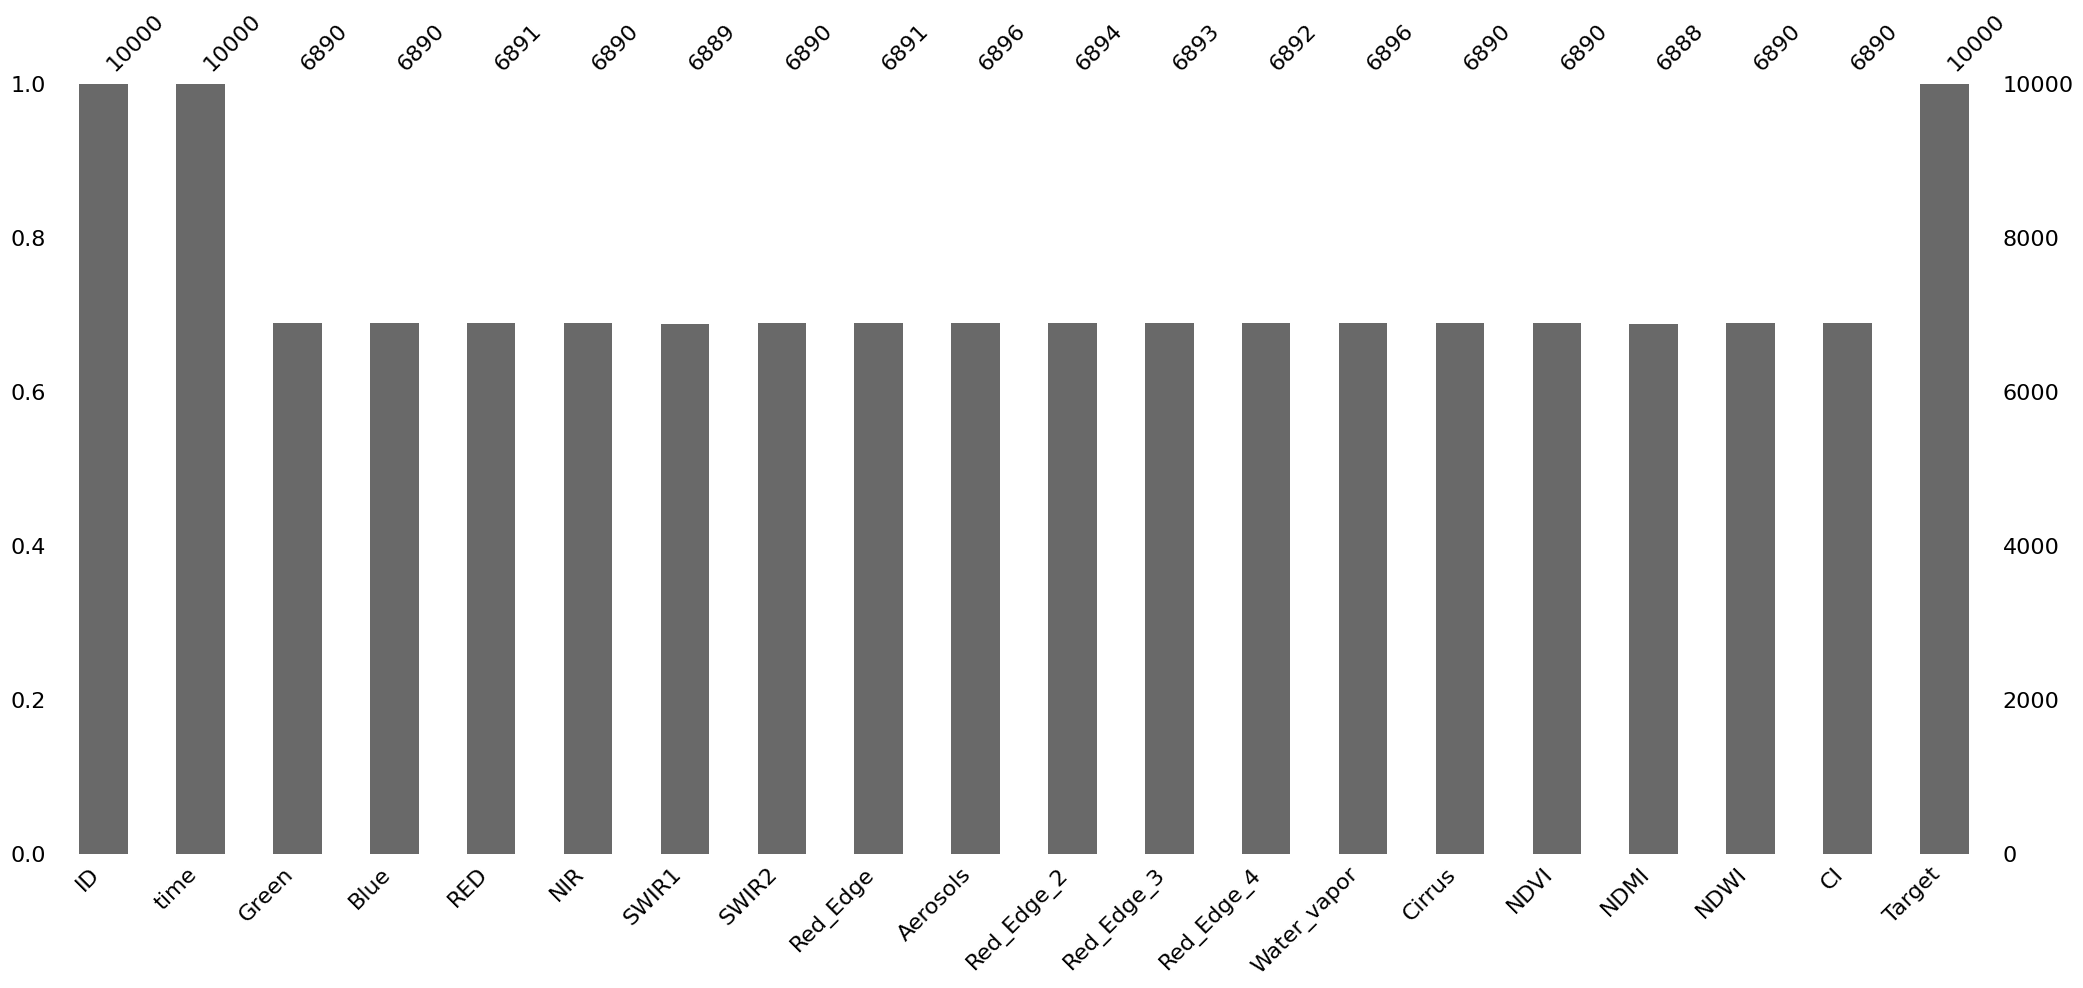

In [15]:

msno.bar(subset_train)

<Axes: >

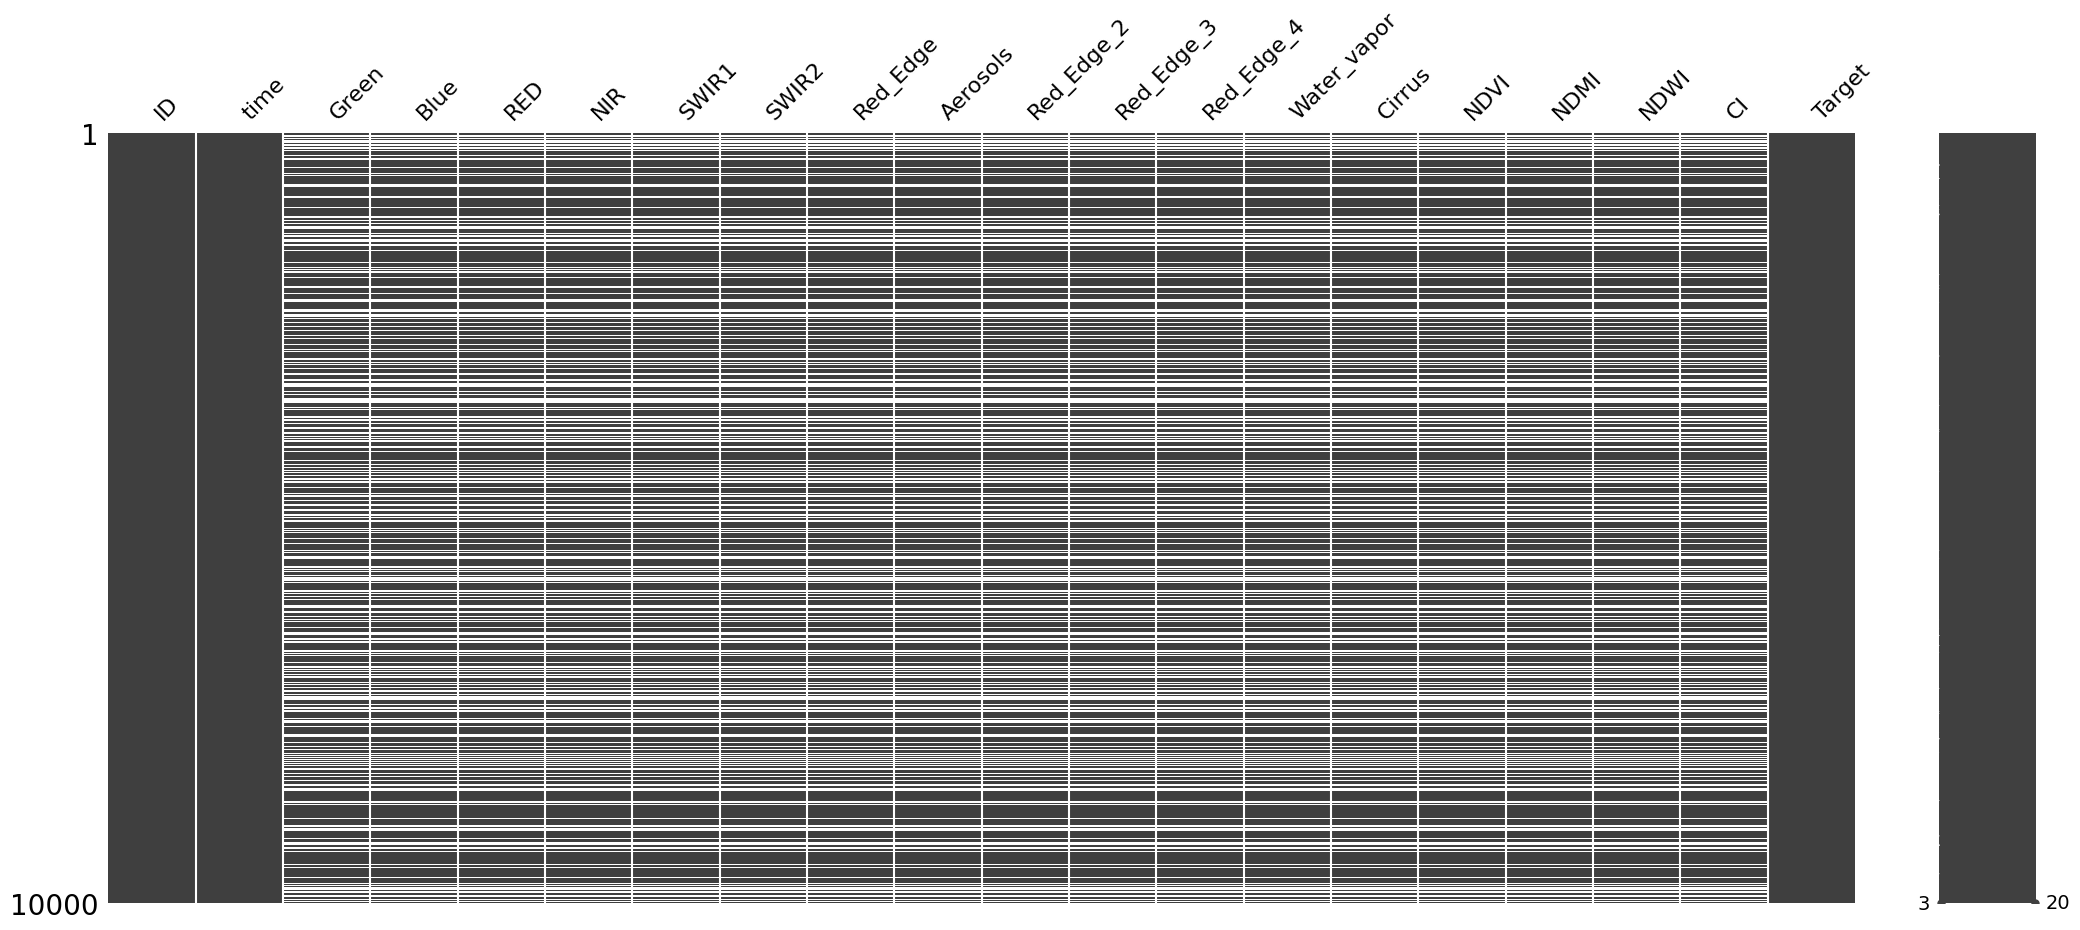

In [16]:

msno.matrix(subset_train)

<Axes: >

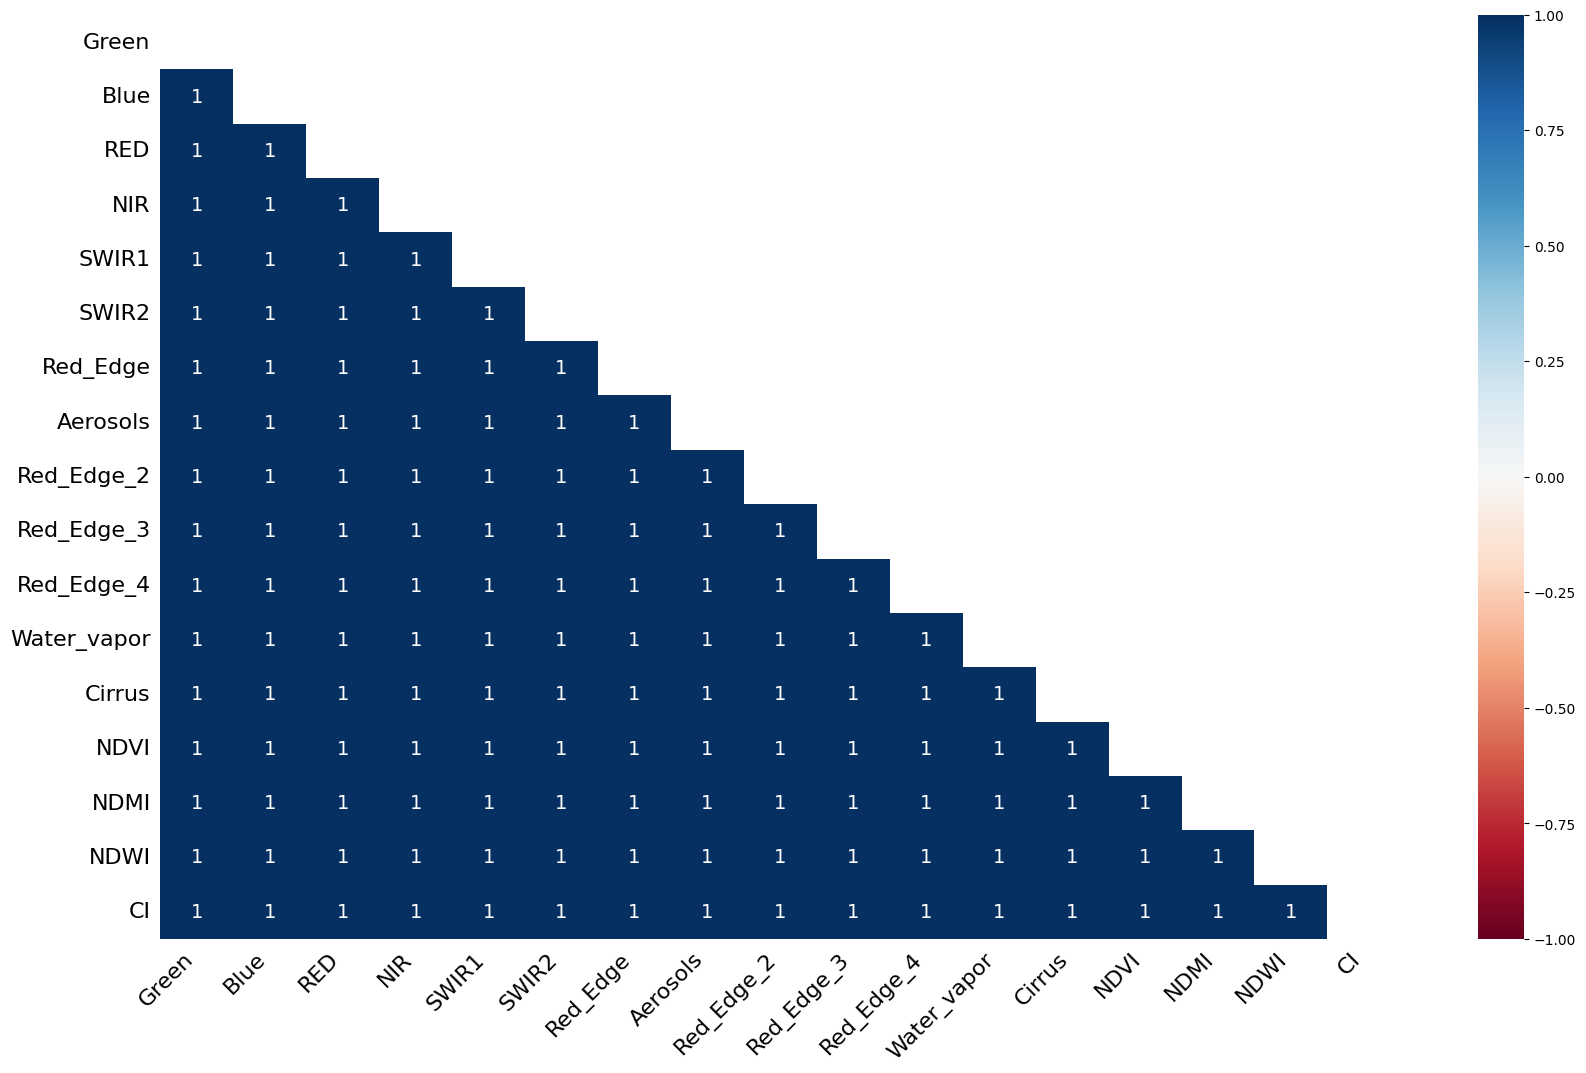

In [17]:

msno.heatmap(subset_train)

In [35]:
# Drop all rows with missing values
train = train.dropna()

In [36]:
import pandas as pd

def split_dataset_by_target(df, target_col, target_vals, n_samples_per_target):
    """Splits a dataset into subsets based on target values.

    Args:
    df: The input DataFrame.
    target_col: The name of the target column.
    target_vals: A list of target values to sample.
    n_samples_per_target: The desired number of samples per target value.

    Returns:
    A new DataFrame containing the sampled data.
    """

    # Create empty list to store selected rows
    selected_rows = []

    # Iterate through target values and sample rows
    for val in target_vals:
        target_rows = df[df[target_col] == val].sample(n=n_samples_per_target, random_state=42)  # Set random_state for reproducibility
        selected_rows.extend(target_rows.index)

    # Get the remaining rows (excluding those already selected)
    remaining_rows = df.index.difference(selected_rows)

    # Sample 4000 rows from the remaining rows (you can adjust this)
    remaining_sample = df.loc[remaining_rows].sample(n=4000, random_state=42)  # Set random_state for reproducibility

    # Combine selected rows with remaining sample
    selected_rows.extend(remaining_sample.index)

    # Create a new dataframe from selected rows
    subset_df = df.loc[selected_rows]

    return subset_df

# Assuming your DataFrame is called 'train' and the target column is 'Target'
subset_train = split_dataset_by_target(train, 'Target', [0, 1, 2], 2000)

# 'subset_train' now contains your desired split dataset

In [37]:
subset_train.isnull().sum()

,0
ID,0
time,0
Green,0
Blue,0
RED,0
NIR,0
SWIR1,0
SWIR2,0
Red_Edge,0
Aerosols,0


In [39]:
subset_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 12906 to 3541095
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           10000 non-null  object 
 1   time         10000 non-null  object 
 2   Green        10000 non-null  float64
 3   Blue         10000 non-null  float64
 4   RED          10000 non-null  float64
 5   NIR          10000 non-null  float64
 6   SWIR1        10000 non-null  float64
 7   SWIR2        10000 non-null  float64
 8   Red_Edge     10000 non-null  float64
 9   Aerosols     10000 non-null  float64
 10  Red_Edge_2   10000 non-null  float64
 11  Red_Edge_3   10000 non-null  float64
 12  Red_Edge_4   10000 non-null  float64
 13  Water_vapor  10000 non-null  float64
 14  Cirrus       10000 non-null  float64
 15  NDVI         10000 non-null  float64
 16  NDMI         10000 non-null  float64
 17  NDWI         10000 non-null  float64
 18  CI           10000 non-null  float64
 19  Tar

## EDA

In [38]:
subset_train.describe()

,Green,Blue,RED,NIR,SWIR1,SWIR2,Red_Edge,Aerosols,Red_Edge_2,Red_Edge_3,Red_Edge_4,Water_vapor,Cirrus,NDVI,NDMI,NDWI,CI,Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.270505,0.287082,0.263022,0.390572,0.268740,0.169461,0.272947,0.309268,0.363665,0.420150,0.449121,0.101383,0.020408,0.306116,0.191398,-0.255612,0.065269,0.942800
std,0.210972,0.215743,0.233313,0.177232,0.131774,0.107273,0.217514,0.206842,0.190359,0.188894,0.186893,0.115764,0.059415,0.230703,0.129220,0.172664,0.084241,0.845222
min,0.052100,0.075300,0.030200,0.074600,0.027400,0.009500,0.031600,0.103300,0.064900,0.082200,0.084000,0.009500,0.000500,-0.091124,-0.306784,-0.664775,-0.152456,0.000000
25%,0.110800,0.124000,0.083700,0.263800,0.176175,0.082000,0.110275,0.154675,0.225400,0.282500,0.313400,0.041300,0.001300,0.082758,0.107470,-0.400764,-0.002539,0.000000
50%,0.165600,0.180500,0.148800,0.337000,0.221500,0.132400,0.164900,0.209000,0.291000,0.362900,0.398600,0.058200,0.002300,0.295580,0.186689,-0.241389,0.039261,1.000000
75%,0.390600,0.409375,0.403825,0.483225,0.348100,0.246600,0.398375,0.421200,0.468825,0.522800,0.551000,0.112625,0.009600,0.505243,0.262647,-0.096426,0.118567,2.000000
max,1.160100,1.224100,1.189800,1.177200,0.735200,0.526600,1.203800,1.164100,1.182400,1.216400,1.228000,1.030000,0.584400,0.815075,0.766815,0.036140,0.440392,2.000000


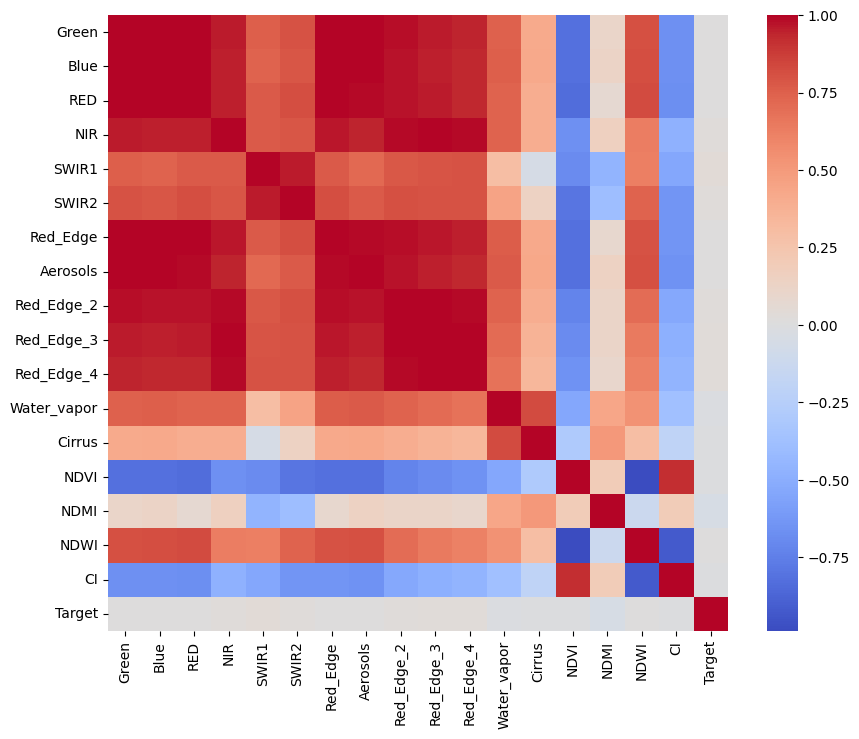

In [40]:
#Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(subset_train.select_dtypes(include=np.number).corr(), cmap='coolwarm') # Select only numeric columns
plt.show()

### NVDI Distribution

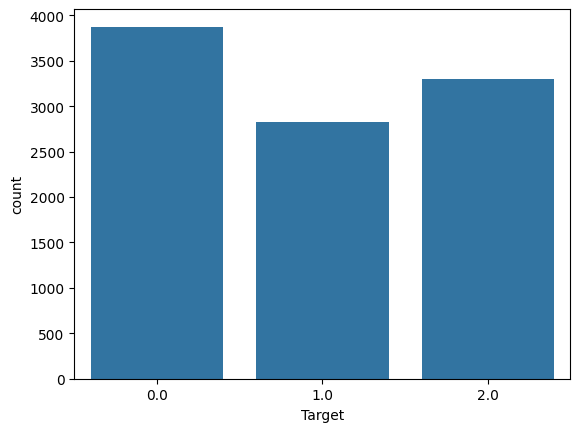

In [41]:
#Target class countplot
sns.countplot(x=subset_train['Target'])
plt.show()

##

[]

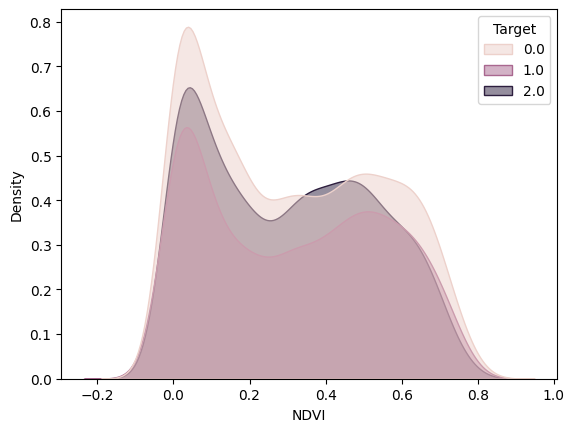

In [42]:
sns.kdeplot(x=subset_train['NDVI'], hue=subset_train['Target'], fill=True, alpha=0.5)
plt.plot()

In [43]:
# Create Box Plot
fig = px.box(subset_train, x='Target', y='NDVI', color='Target')

# Show the plot
fig.show()

In [44]:
fig = px.violin(subset_train, x='Target', y='RED', color='Target')

# Show the plot
fig.show()

### Splitting the data into train and test

In [61]:
from sklearn.model_selection import train_test_split

In [78]:
X = subset_train.drop(['Target', 'ID', 'time'], axis=1)
y = subset_train['Target']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelling

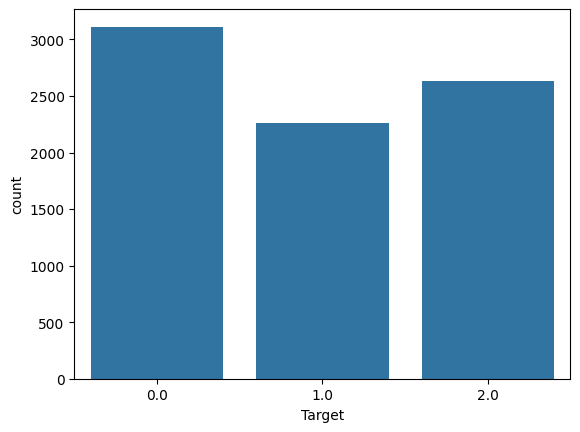

In [80]:
#Target class countplot
sns.countplot(x=y_train)
plt.show()

In [81]:
#Dealing with imbalanced data using smote

from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline


In [82]:
smote = SMOTE(random_state=42)
pipeline = make_pipeline(smote)
X_resampled, y_resampled = pipeline.fit_resample(X, y)

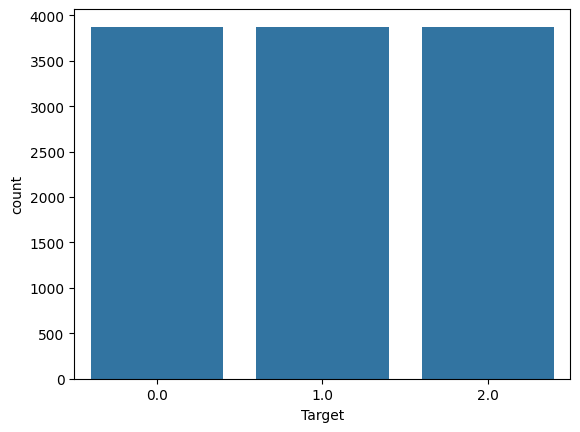

In [83]:
#Target class countplot
sns.countplot(x=y_resampled)
plt.show()

## Modelling

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [85]:
## USing Logistic regression
log = LogisticRegression()
log.fit(X_resampled, y_resampled)

LogisticRegression()

In [86]:
Y_predict = log.predict(X_test)

In [92]:
from sklearn.metrics import confusion_matrix

In [96]:
#Using a confusion matrix
cm =confusion_matrix(y_test, Y_predict)
cm

array([[336, 211, 215],
       [162, 223, 179],
       [178, 200, 296]])

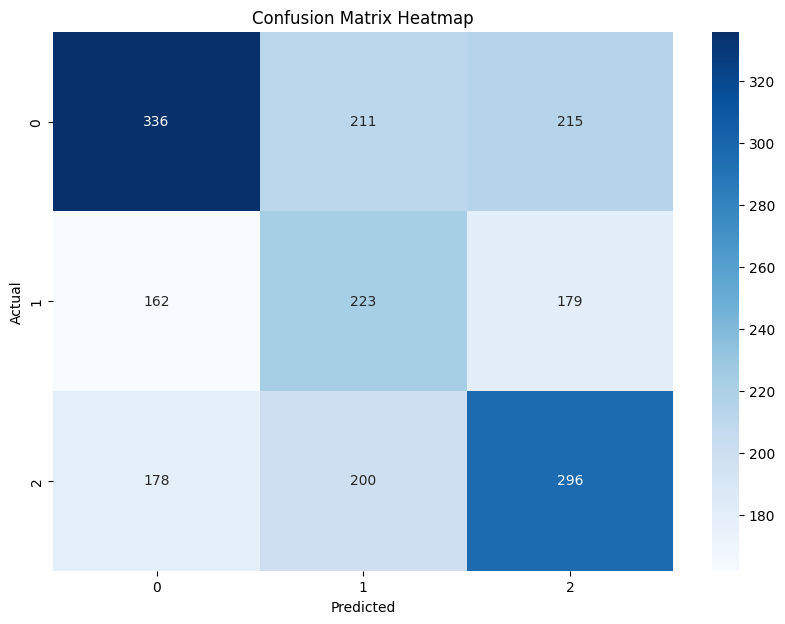

In [97]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [100]:
#Using a classification report
print(classification_report(y_test, Y_predict))

              precision    recall  f1-score   support

         0.0       0.50      0.44      0.47       762
         1.0       0.35      0.40      0.37       564
         2.0       0.43      0.44      0.43       674

    accuracy                           0.43      2000
   macro avg       0.43      0.43      0.42      2000
weighted avg       0.43      0.43      0.43      2000



In [105]:
#Accuracy score
accuracy_score(y_test, Y_predict)

0.4275

In [101]:
#Classification report heatmap
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [102]:
import pandas as pd
from sklearn.metrics import classification_report

# Assuming 'y_test' and 'Y_predict' are your true and predicted labels
report = classification_report(y_test, Y_predict, output_dict=True)
df = pd.DataFrame(report).transpose()

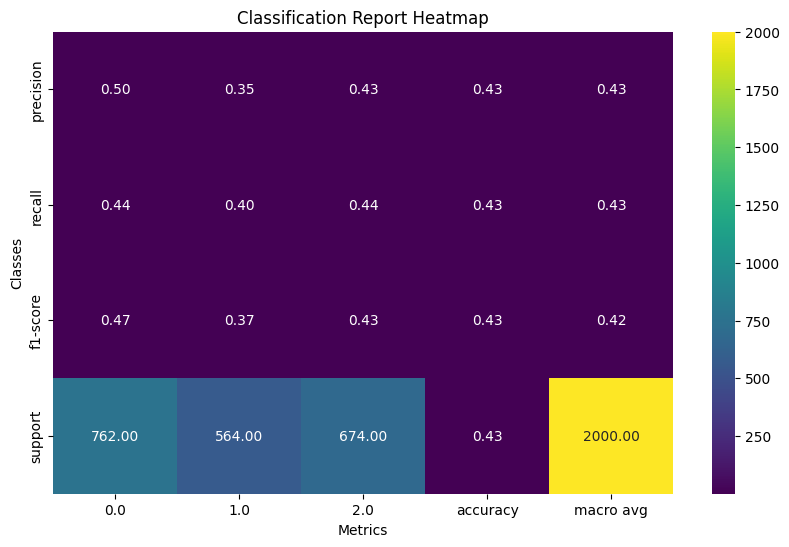

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.heatmap(df.iloc[:-1, :].T, annot=True, cmap='viridis', fmt=".2f")  # Exclude the last row (support) for better visualization
plt.title('Classification Report Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

In [113]:
## USing Logistic regression
model = SVC()
model.fit(X_resampled, y_resampled)
Y_predict = model.predict(X_test)

In [114]:
#Using a confusion matrix
cm =confusion_matrix(y_test, Y_predict)
cm

array([[346, 230, 186],
       [ 98, 310, 156],
       [146, 209, 319]])

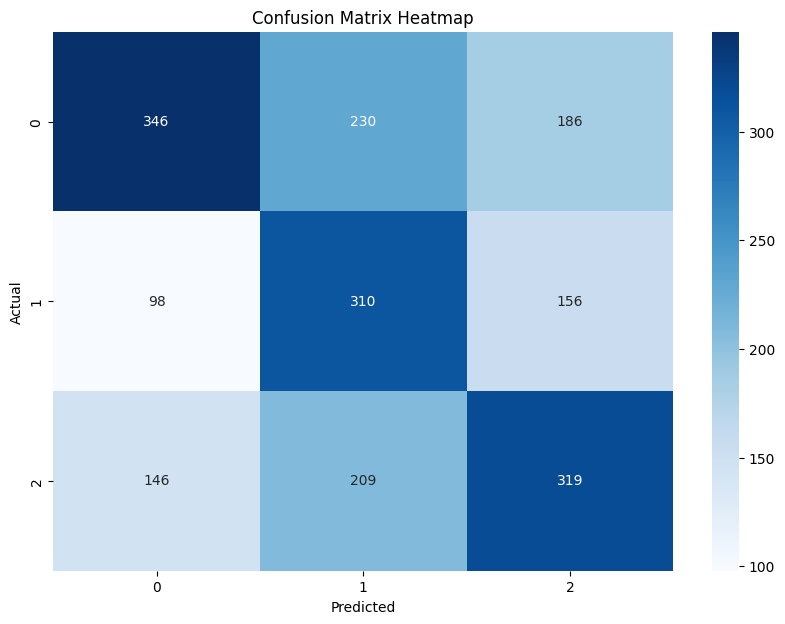

In [115]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [116]:
#Using a classification report
print(classification_report(y_test, Y_predict))

              precision    recall  f1-score   support

         0.0       0.59      0.45      0.51       762
         1.0       0.41      0.55      0.47       564
         2.0       0.48      0.47      0.48       674

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.50      0.49      0.49      2000



In [117]:
#Accuracy score
accuracy_score(y_test, Y_predict)

0.4875

In [118]:
rf = RandomForestClassifier()
rf.fit(X_resampled, y_resampled)
Y_predict = rf.predict(X_test)

In [119]:
#Using a confusion matrix
cm =confusion_matrix(y_test, Y_predict)
cm

array([[762,   0,   0],
       [  0, 564,   0],
       [  0,   0, 674]])

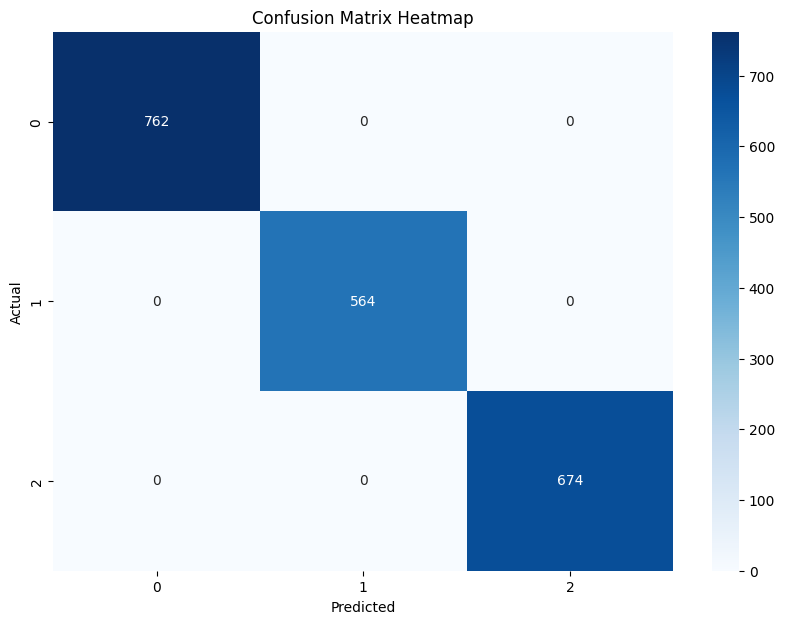

In [120]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [121]:
#Using a classification report
print(classification_report(y_test, Y_predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       762
         1.0       1.00      1.00      1.00       564
         2.0       1.00      1.00      1.00       674

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

